In [1]:
import numpy as np
import cv2
import math
import random
import matplotlib.pyplot as plt

In [2]:
def isodata(img, C):
    C = C+1
    v = np.zeros((C, img.shape[2]))

    for c in range(C):
        v[c,:]=( random.random(), random.random(), random.random() )

    resimg = np.ones((img.shape[0], img.shape[1]), dtype=int)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resimg[i, j] = np.argmin(np.linalg.norm(img[i, j]-v, axis=1))

    for _ in range(C):
        for c in range(C):
            points_in_cluster = img[resimg == c]
            if len(points_in_cluster) > 0:
                v[c, :] = np.mean(points_in_cluster, axis=0)

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                resimg[i, j] = np.argmin(np.linalg.norm(img[i, j]-v, axis=1))

    return resimg
#Primero elegimos los centros de manera aleatoria, después iteramos la imagen
#y asignamos a cada pixel la distancia euclidea entre la imagen original y los
#centros calculados anteriormente, después adignamos los valores c y 0 a la
#matriz y volvemos realizar el primer bucle

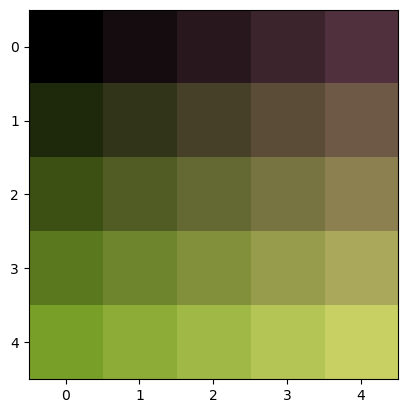

In [3]:
#generear un degradado 5x5
tam = 5
b1 = np.zeros([tam, tam,1], dtype=np.uint8)
b2 = np.zeros([tam, tam,1], dtype=np.uint8)
b3 = np.zeros([tam, tam,1], dtype=np.uint8)

i=0
while i < b1.shape[0]:
    j=0
    while j< b1.shape[1]:
        b1[i,j]= j*20+i*30
        b2[i,j]= j*12+i*40
        b3[i,j]= j*15+i*10
        j = j+1
    i = i+1
img = cv2.merge((b1,b2,b3))

plt.figure(1)
plt.imshow(img)

In [4]:
res = isodata(img,4)
print(res)

[[2 3 3 3 4]
 [3 3 4 4 4]
 [1 1 4 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]]


In [5]:
def seudo(img):
    resimg = np.zeros((img.shape[0], img.shape[1],3), np.uint8)
    i = 0
    while i < img.shape[0]:
        j = 0
        while j < img.shape[1]:
            if img[i,j] == 0:
                resimg[i,j,:] = [255,0,0]
            elif img[i,j] == 1:
                resimg[i,j,:] = [0,255,0]
            elif img[i,j] == 2:
                resimg[i,j,:] = [0,0,255]
            elif img[i,j] == 3:
                resimg[i,j,:] = [255,255,0]
            elif img[i,j] == 4:
                resimg[i,j,:] = [0,255,255]
            elif img[i,j] == 5:
                resimg[i,j,:] = [255,0,255]
            else:
                resimg[i,j,:] = [0,0,0]
            j = j+1
        i= i+1
    return resimg

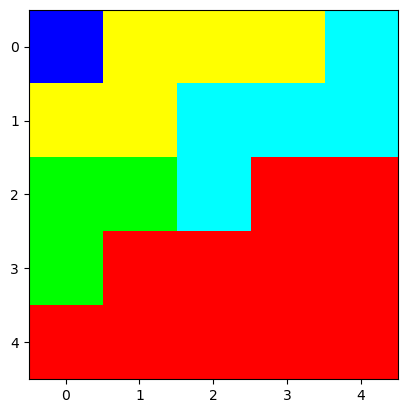

In [6]:
res_seudo = seudo(res)
plt.figure(2)
plt.imshow(res_seudo)

True

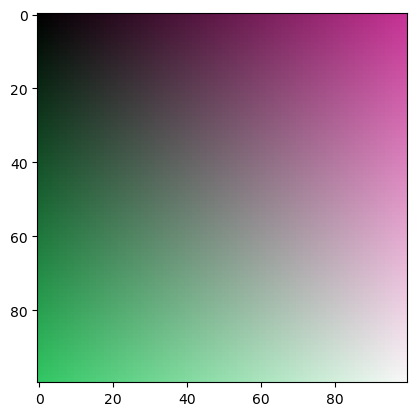

In [7]:
#ejercicio 2

tam = 100
b1 = np.zeros([tam,tam,1], dtype=np.uint8)
b2 = np.zeros([tam,tam,1], dtype=np.uint8)
b3 = np.zeros([tam,tam,1], dtype=np.uint8)

i = 0
while i < b1.shape[0]:
    j = 0
    while j < b1.shape[1]:
        b1[i,j] = j*2+i*0.5
        b2[i,j] = j*0.5+i*2
        b3[i,j] = j*1.5+i*1
        j = j+1
    i = i+1
img = cv2.merge((b1,b2,b3))
plt.figure(1)
plt.imshow(img)

cv2.imwrite("degradado100.png", img)

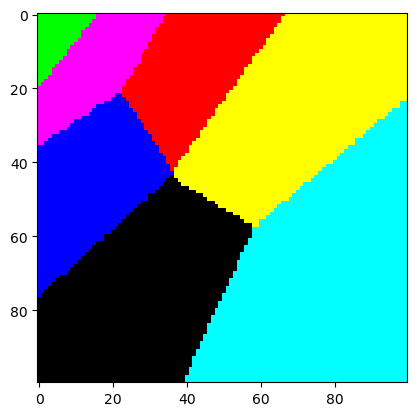

In [8]:
res = isodata(img,6)
res_seudo = seudo(res)
plt.figure(2)
plt.imshow(res_seudo)

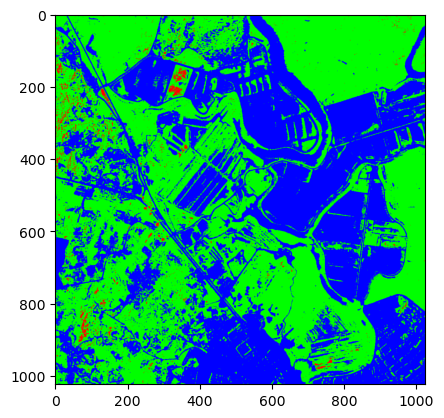

In [9]:
#ejercicio 3
im = cv2.imread('ISS_Spain_IslaCristina_monobanda.jpg')
res = isodata(im,2)
res_seudo = seudo(res)
plt.figure(1)
plt.imshow(res_seudo)

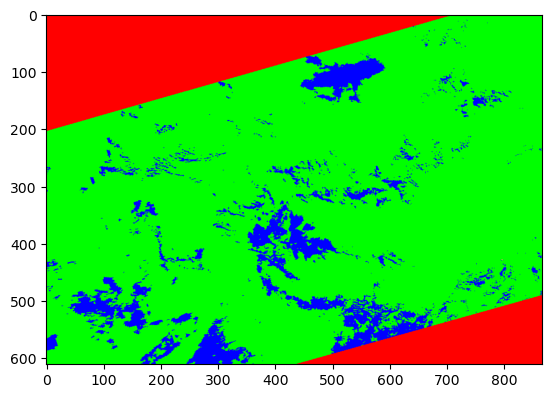

In [10]:
b1 = cv2.imread('NOAA_1-5_R.png', cv2.IMREAD_GRAYSCALE)
b2 = cv2.imread('NOAA_2-5_NIR.png', cv2.IMREAD_GRAYSCALE)
b3 = cv2.imread('NOAA_3-5_SWIR.png', cv2.IMREAD_GRAYSCALE)

im= cv2.merge((b1,b2,b3))

res=isodata(im,3)
res_seudo = seudo(res)
plt.figure(2)
plt.imshow(res_seudo)

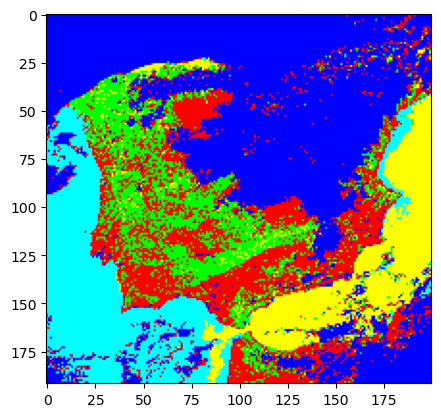

In [11]:
im = cv2.imread('filomena.jpg')

im0 = int(im.shape[0]*0.1)
im1 = int(im.shape[1]*0.1)
im2 = cv2.resize(im,(im0,im1))

res = isodata(im2,4)
res_seudo = seudo(res)
plt.figure(1)
plt.imshow(res_seudo)